Universidad Torcuato Di Tella

Licenciatura en Tecnología Digital\
**Tecnología Digital VI: Inteligencia Artificial**

# **scikit-learn**

### **Representación de la información**

Para poder entrenar un modelo, tenemos que entender cómo se representa la información.

La información se representa a través de:

   - Una **matriz de atributos**, usualmente llamada `X`, en donde cada fila es una observación y cada columna una característica de los datos. El tamaño de la matriz es de [*n_samples*, *n_features*], en donde *n_samples* corresponde a la cantidad de observaciones que tenemos y *n_features*, a la cantidad de atributos.

   - Un **vector de etiquetas**, usualmente llamado `y`, que contiene la etiqueta correspondiente para cada observación. Suele ser un vector unidimensional de longitud *n_samples*.

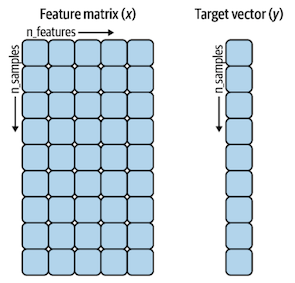

Fuente:  "Part V. Machine Learning" en VanderPlas, J. (2022). Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.".

### **Datos**

Vamos a usar como ejemplo la base de datos **Breast Cancer** que se encuentra entre las bases de datos provistas por scikit-learn. También la podemos encontrar en este [enlace](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

Los datos fueron recopilados por el Dr. William H. Wolberg de la Universidad de Wisconsin y se utilizan para tareas de **clasificación de cáncer de mama**.

Este conjunto de datos contiene **características calculadas a partir de una imagen digitalizada** de una aspiración con aguja fina (FNA) de una masa mamaria. Las características describen ciertos núcleos celulares presentes en la imagen y están relacionadas con el diagnóstico del tumor, que puede ser benigno (B) o maligno (M).

El conjunto de datos contiene **30 características numéricas y la variable objetivo (etiqueta) que indica si el tumor es benigno (0) o maligno (1)**.

Inspeccionemos la representación de los datos.

In [1]:
import pandas as pd

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [2]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.1251,0.24140,0.38290,0.18250,0.2576,0.07602
1,13.85,19.60,88.68,592.6,0.08684,0.06330,0.013420,0.022930,0.1555,0.05673,...,15.63,28.01,100.90,749.1,0.1118,0.11410,0.04753,0.05890,0.2513,0.06911
2,14.19,23.81,92.87,610.7,0.09463,0.13060,0.111500,0.064620,0.2235,0.06433,...,16.86,34.85,115.00,811.3,0.1559,0.40590,0.37440,0.17720,0.4724,0.10260
3,10.86,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
4,13.08,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
422,10.71,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,...,11.69,25.21,76.51,410.4,0.1335,0.25500,0.25340,0.08600,0.2605,0.08701
423,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.060900,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.46340,0.20480,0.3679,0.09870
424,15.37,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.28460,0.14760,0.2556,0.06828



En `X_train` (la matriz de atributos), tenemos que cada fila corresponde a una observación de nuestro conjunto; es decir, a una imagen. Mientras tanto, cada columna contiene los valores correspondientes al atributo.

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error         4

En este caso, el valor de *n_samples* es 426 y el valor de *n_features* es 30.

Además, todas las variables son continuas y no hay ningún valor faltante.

También, podemos inspeccionar cómo se representa el *target vector*.

In [4]:
y_train

,target
0,0
1,1
2,0
3,1
4,1
...,...
421,1
422,1
423,0
424,0


Es un vector unidimensional que tiene longitud *n_samples* (426).

En este vector, tenemos la etiqueta correspondiente a cada observación. En este caso, la etiqueta es o 0 o 1 y representa a la clase (tumor benigno/maligno, respectivamente).

### **Esquema de modelado**

Ahora, ya sabemos cómo se representa la información y cuáles son los datos de interés que vamos a utilizar.

Pero, ¿cómo hacemos para armar un modelo y **predecir si, ante una nueva imagen, el tumor será o benigno o maligno**?

Como el procedimiento es similar para los diferentes algoritmos de aprendizaje provistos por scikit-learn, vamos a verlo con un caso sencillo: una **regresión logística**.

##### **Creación de una instancia**

In [6]:
from sklearn.linear_model import LogisticRegression

# Cargamos los datos de testeo para después ver qué tan bien generaliza el modelo.
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

reg_log = LogisticRegression(multi_class = 'ovr', solver = 'liblinear')

Creamos una instancia de la clase `LogisticRegression` y la guardamos en el objeto `reg_log`.

**Importante**: hasta el momento, el modelo **no** fue entrenado, sino que solamente lo definimos.

##### **Entrenamiento del modelo**

Una vez que tenemos definido el modelo, queremos que aprenda de la información que tenemos. Para esto usamos el método `fit`.

Este método debe recibir como argumentos a la matriz de atributos `X` y al vector de etiquetas `y`.

In [7]:
reg_log.fit(X_train, y_train)

c:\Users\Admin\anaconda3\envs\td-vi\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\anaconda3\envs\td-vi\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'ovr'


El objeto `reg_log` es, ahora, una regresión logística entrenada con nuestros datos (pertenecientes al conjunto de entrenamiento) y le podemos pedir los valores de los coeficientes calculados. Esto lo hacemos con el atributo `coef_`.

In [8]:
reg_log.coef_

array([[ 2.1030328 ,  0.12387708, -0.08122395, -0.00424793, -0.11383421,
        -0.37181673, -0.55854216, -0.29657187, -0.16715899, -0.02086886,
        -0.03780508,  1.29114058, -0.05236812, -0.10287873, -0.01484707,
        -0.03742921, -0.05534987, -0.03719964, -0.03358599, -0.00283881,
         1.42178843, -0.38745418, -0.12307076, -0.02318543, -0.22406526,
        -1.06981131, -1.30890784, -0.53276519, -0.54292409, -0.11095931]])

Qué es esto de arriba?

##### **Predicción**

Con el modelo entrenado, podemos hacer predicciones para nuevas imágenes. Esto se hace con el método `predict`, al cual le pasamos observaciones y nos devuelve la predicción para cada una de ellas.



In [9]:
reg_log.predict(X_test) # Umbral por defecto = 0.5.

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

Además, existe el método `predict_proba` que nos devuelve la probabilidad, que tiene una observación, de pertenecer a cada una de las clases (para cada una de las observaciones pasadas como argumento).


In [10]:
reg_log.predict_proba(X_test)

array([[9.99999932e-01, 6.77403418e-08],
       [1.00000000e+00, 5.31967233e-13],
       [9.99999999e-01, 9.47474022e-10],
       [1.00000000e+00, 2.87635482e-10],
       [1.00000000e+00, 1.73483171e-12],
       [1.69145658e-02, 9.83085434e-01],
       [3.17005170e-01, 6.82994830e-01],
       [1.36916186e-02, 9.86308381e-01],
       [8.54731768e-04, 9.99145268e-01],
       [2.08962196e-03, 9.97910378e-01],
       [4.22422563e-04, 9.99577577e-01],
       [6.24959456e-01, 3.75040544e-01],
       [1.74768213e-01, 8.25231787e-01],
       [6.53371049e-02, 9.34662895e-01],
       [4.90006839e-05, 9.99950999e-01],
       [1.89020730e-03, 9.98109793e-01],
       [9.05212470e-01, 9.47875303e-02],
       [3.50629427e-01, 6.49370573e-01],
       [3.40590678e-03, 9.96594093e-01],
       [1.00000000e+00, 1.38152539e-10],
       [9.86777767e-01, 1.32222332e-02],
       [3.72423327e-04, 9.99627577e-01],
       [3.76630427e-03, 9.96233696e-01],
       [1.03830842e-03, 9.98961692e-01],
       [1.597956

Podemos comparar "manualmente", para cada una de las observaciones, su etiqueta versus la predicción de nuestro modelo de dicha etiqueta para la observación en cuestión.

In [11]:
results = pd.DataFrame({'Real': y_test.target, 'Predicho': reg_log.predict(X_test)})
results.head(10)

,Real,Predicho
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,1
7,1,1
8,1,1
9,1,1


En la fila 7 (posición 6), vemos que nuestra predicción fue diferente a la etiqueta real de la observación. De alguna manera, queremos saber qué tan bueno es nuestro modelo.

##### **Evaluación**

¿Cómo podemos saber qué tan bueno es nuestro modelo?

Uno de los métodos que tenemos para saberlo es `score`.

En el caso de regresión logística, este método toma las observaciones que queremos predecir, junto con sus etiquetas reales, y calcula la métrica *accuracy*.

**Siempre leer la documentación para saber cuál es la métrica que se está calculando**.

*Accuracy* es una de las métricas de *performance* más comunes. Su fórmula es la siguiente:

$\text{Accuracy} = \frac{\text{Cantidad de predicciones correctas}}{\text{Cantidad total de predicciones}} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$.

No obstante, cabe aclarar que también existen otras métricas para evaluar los modelos, que veremos más adelante.

In [12]:
reg_log.score(X_test, y_test)

0.9440559440559441

### **Pipelines**

Recapitulando, hasta ahora, definimos nuestro modelo; hicimos que aprenda sobre la información que tenemos y, luego, que prediga la etiqueta para nuevas observaciones; y evaluamos su performance.

Pero, ¿qué sucede cuando la información que tenemos no está del todo bien?

Es muy probable que, en la base de datos que tengamos, falten datos o haya que reescalar atributos, entre otras cuestiones. De alguna manera, tenemos que "transformar" los datos. A esto se lo conoce como el **preprocesamiento** y hay que realizarlo **antes de entrenar** al modelo.

scikit-learn ofrece una manera muy sencilla y eficiente de preprocesar los datos y, a su vez, definir el modelo. Esto se hace a través de **pipelines**. En el pipeline, se pueden encadenar múltiples etapas de procesamiento de datos. Entonces, si tenemos que aplicar una serie de pasos para preprocesar los datos y luego entrenar un modelo, el pipeline nos permite combinar estos pasos de manera elegante.

Veamos el siguiente ejemplo.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scale', StandardScaler()), # Escalar atributos.
    ('classifier', LogisticRegression(multi_class = 'ovr', solver = 'liblinear')) # Modelo de regresión logística.
])

En el objeto `pipeline` se aplican los pasos de manera **secuencial**.

**El último paso siempre tiene que ser la definición del modelo que se va a utilizar**.

Una vez que tenemos definido el `pipeline`, podemos seguir el esquema que usamos en `reg_log`: entrenar, predecir y evaluar el modelo.


In [14]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

c:\Users\Admin\anaconda3\envs\td-vi\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\anaconda3\envs\td-vi\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [15]:
pipeline.score(X_test, y_test)

0.9790209790209791

Ahora sí, ya sabemos cómo funciona scikit-learn y cómo entrenar y evaluar nuestros propios modelos predictivos.